# XenonPy-Basic tutorial

### useful functions

In [1]:
%run tools.ipynb

np.random.seed(12345)

### built-in data set

In this tutorial, we will use some data taking from the Materials Project database.
You can fetch data yourself if you like. Just follow the offical [API documents](https://www.materialsproject.org/docs/api).

In this turorial, xenonpy will download the prepared data set automatically.

In [2]:
# --- import necessary libraries

from xenonpy.datatools import preset

In [3]:
# ---- use preset to load XenonPy built-in data

mp_inorganic = preset.mp_inorganic
mp_structure = preset.mp_structure

In [4]:
# show data summary
mp_inorganic.info()
mp_inorganic.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 86670 entries, mp-10018 to mp-999484
Data columns (total 18 columns):
band_gap                     86670 non-null float64
composition                  86670 non-null object
density                      86670 non-null float64
e_above_hull                 86670 non-null float64
efermi                       66253 non-null float64
elements                     86670 non-null object
final_energy_per_atom        86670 non-null float64
formation_energy_per_atom    86670 non-null float64
has_bandstructure            86670 non-null bool
n_elemets                    86670 non-null int64
nsites                       86670 non-null int64
oxide_type                   86670 non-null object
point_group                  86670 non-null object
pretty_formula               86670 non-null object
space_group                  86670 non-null object
space_group_number           86670 non-null int64
total_magnetization          86670 non-null float64
volume          

,band_gap,density,e_above_hull,efermi,final_energy_per_atom,formation_energy_per_atom,n_elemets,nsites,space_group_number,total_magnetization,volume
count,86670.000000,86670.000000,86670.000000,66253.000000,86670.000000,86670.000000,86670.000000,86670.000000,86670.000000,86670.000000,86670.000000
mean,1.165200,5.023133,0.150132,2.904769,-5.768609,-1.450097,3.273416,27.026457,90.532526,5.419839,463.558047
std,1.565816,2.791722,0.455569,2.728530,1.834651,1.255299,0.885890,27.402754,80.654820,12.550083,500.911367
min,0.000000,0.020144,0.000000,-14.201352,-14.331771,-4.594445,1.000000,1.000000,1.000000,0.000000,5.602387
25%,0.000000,3.103358,0.000000,1.020666,-7.012359,-2.463014,3.000000,8.000000,14.000000,0.000070,167.444895
50%,0.214900,4.295985,0.029324,2.739437,-5.991692,-1.568587,3.000000,18.000000,63.000000,0.003297,311.857447
75%,2.091175,6.425028,0.096308,4.656683,-4.612034,-0.484459,4.000000,36.000000,164.000000,5.000071,576.429402
max,17.891400,24.579228,5.890641,19.275775,-0.016100,5.355513,8.000000,296.000000,230.000000,279.988888,14531.250287


### descriptor calculator

Calculate a descriptor set by using **xenonpy.descriptor** can generally be divied in 3 steps.
1. Select/build a descriptor calculator and prepare the input data.
2. Make a instance of your calculator with init params.
3. Use ***transform/fit_transform*** method to tranform input objects to descriptors (some calculators need ***fit*** before ***tranform***).

In this tutorial, we will calculate **Compositions** and **RadialDistributionFunction** descriptors.

In [5]:
# --- 1. Select/build a descriptor calculator and prepare the input data.

# --- import necessary libraries
from xenonpy.descriptor import Compositions, RadialDistributionFunction

mp_comps = mp_inorganic['composition'].sample(10000)
mp_strcs = mp_structure['structure'].sample(100)

In [6]:
# --- check your data
mp_strcs.head(5)

mp-655078     [[2.3080013  7.61600287 8.18994839] K, [0.5878...
mp-1025363    [[ 4.24005237e+00 -3.89708520e-09 -7.38910203e...
mp-28318      [[1.5906017  4.15725542 8.71952621] O, [4.1927...
mp-767050     [[1.57215956 3.46110329 1.2376814 ] Li, [3.677...
mp-1111031    [[3.09606138 1.78751177 1.26396169] Rb, [9.288...
Name: structure, dtype: object

In [7]:
# --- 2. Make an instance of your calculator

# init a composition descriptor calculator
composition = Compositions(n_jobs=4)

# init a RDF descriptor calculator
rdf = RadialDistributionFunction(n_jobs=1)

In [8]:
# check your calculator
rdf

RadialDistributionFunction(n_bins=201, n_jobs=1, on_errors='raise',
              r_max=20.0, return_type='any')

In [9]:
# --- 3. Use transform/fit_transform method to tranform input objects to descriptors

comps_desc = composition.fit_transform(mp_comps)

In [10]:
# check your calculator

comps_desc.head(5)

,ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,ave:c6_gb,ave:covalent_radius_cordero,ave:covalent_radius_pyykko,...,min:num_s_valence,min:period,min:specific_heat,min:thermal_conductivity,min:vdw_radius,min:vdw_radius_alvarez,min:vdw_radius_mm3,min:vdw_radius_uff,min:sound_velocity,min:Polarizability
mvc-7276,31.142857,160.257954,207.714286,18.357143,74.576400,840.537143,54.774880,474.685714,105.142857,103.571429,...,2.0,2.0,0.124,0.02658,152.0,150.0,182.0,339.9,317.5,0.802000
mp-1027526,42.000000,141.166667,233.500000,14.655000,99.565333,2452.004000,104.883333,477.333333,133.166667,124.333333,...,1.0,3.0,0.133,0.20500,180.0,182.0,215.0,305.2,2610.0,2.900000
mp-10092,29.625000,145.875000,221.750000,15.400000,66.274413,1910.162500,73.500000,708.125000,136.375000,124.000000,...,1.0,4.0,0.385,0.52000,190.0,182.0,226.0,349.5,2000.0,3.770000
mp-772922,6.967742,119.310273,179.161290,13.477419,13.837223,693.915806,60.804522,81.231935,65.741935,65.774194,...,1.0,1.0,0.711,0.02583,110.0,120.0,162.0,288.6,317.5,0.666793
mp-1025574,47.777778,144.555556,236.666667,15.051111,114.968222,2567.044444,112.577778,490.888889,137.111111,127.555556,...,1.0,4.0,0.133,0.52000,190.0,182.0,229.0,305.2,2610.0,3.770000


In [11]:
strcs_desc = rdf.fit_transform(mp_strcs)

In [12]:
strcs_desc.head(5)

,0.1,0.2,0.30000000000000004,0.4,0.5,0.6000000000000001,0.7000000000000001,0.8,0.9,1.0,...,19.1,19.200000000000003,19.3,19.400000000000002,19.5,19.6,19.700000000000003,19.8,19.900000000000002,20.0
mp-655078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,369.224295,...,66.632385,59.571847,56.704355,60.685078,66.454664,62.613177,62.517390,59.961992,61.898802,65.993652
mp-1025363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,6.610638,7.059938,5.961197,5.582551,6.655469,8.576252,6.520678,6.576602,5.726834,8.355150
mp-28318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,20.679627,21.268168,19.601192,18.182201,21.325634,19.565248,17.214772,19.995556,18.570190,17.778407
mp-767050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,30.247928,29.025792,24.909969,27.540476,33.193224,22.410700,20.460216,30.273726,19.838945,25.699878
mp-1111031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,4.417576,9.617433,10.383023,6.850655,3.390196,8.389007,7.058264,11.918947,6.509881,12.889566


### difference of Base class

In [13]:
print('Base class of rdf:', rdf.__class__.__bases__)
print('Base class of composition:', composition.__class__.__bases__)

Base class of rdf: (<class 'xenonpy.descriptor.base.BaseFeaturizer'>,)
Base class of composition: (<class 'xenonpy.descriptor.base.BaseDescriptor'>,)


### visualization of descriptor

In [14]:
# use formation energy as our target
property_ = 'formation_energy_per_atom'

# --- sort property 
form_en = mp_inorganic[property_].loc[mp_comps.index].dropna()
sorted_form_en = form_en.sort_values()

# --- sort descriptors
sorted_desc = comps_desc.loc[sorted_form_en.index]

In [15]:
# check data

sorted_desc.head(5)

,ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,ave:c6_gb,ave:covalent_radius_cordero,ave:covalent_radius_pyykko,...,min:num_s_valence,min:period,min:specific_heat,min:thermal_conductivity,min:vdw_radius,min:vdw_radius_alvarez,min:vdw_radius_mm3,min:vdw_radius_uff,min:sound_velocity,min:Polarizability
mp-1100894,32.758621,157.718172,210.655172,16.0000,80.623941,1703.986552,67.586716,883.569829,113.172414,100.793103,...,2.0,2.0,0.113,0.02658,152.0,150.0,182.0,334.5,317.5,0.802
mp-8354,21.000000,147.267711,193.250000,18.4500,48.975170,996.257500,42.099205,940.150000,94.500000,93.000000,...,2.0,2.0,0.197,0.02770,147.0,146.0,171.0,336.4,2475.0,0.557
mp-27185,24.500000,145.799699,188.843750,18.4875,59.571393,1047.882812,46.783546,601.395899,89.500000,88.937500,...,1.0,2.0,0.113,0.02770,147.0,146.0,171.0,336.4,2000.0,0.557
mp-17673,27.400000,148.752091,196.700000,16.6900,65.189042,1160.943000,53.020678,614.440000,97.800000,93.200000,...,2.0,2.0,0.155,0.02658,147.0,146.0,171.0,336.4,317.5,0.557
mp-752674,18.133333,148.683984,193.866667,19.1000,40.868464,911.874000,43.159222,896.813333,94.133333,92.600000,...,2.0,2.0,0.192,0.02770,147.0,146.0,171.0,334.5,1620.0,0.557


In [16]:
# --- import necessary libraries

from xenonpy.visualization import DescriptorHeatmap

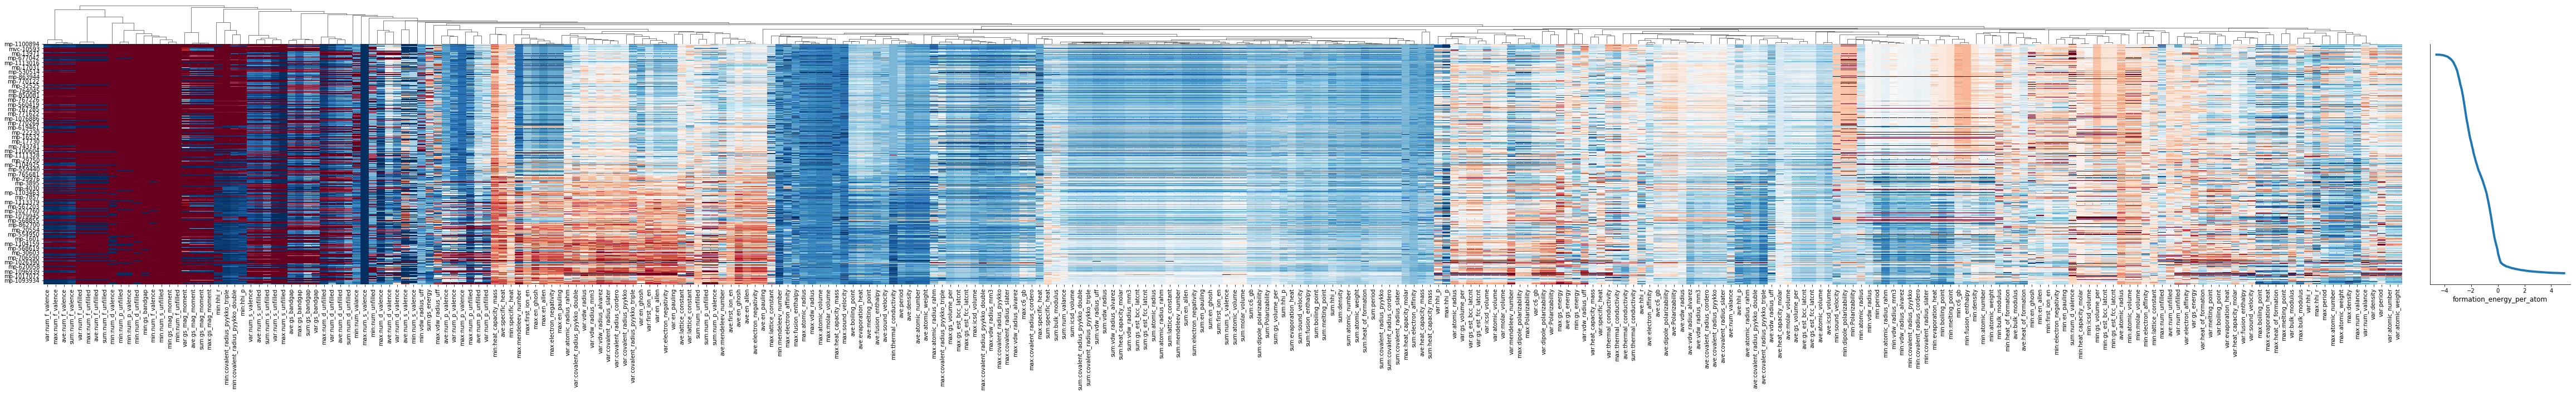

In [17]:
heatmap = DescriptorHeatmap( 
        bc=True,  # use box-cox transform 
        save=dict(fname='heatmap_formation_energy', dpi=200, bbox_inches='tight'),  # save fingure to file
        figsize=(70, 10))
heatmap.fit(sorted_desc)
heatmap.draw(sorted_form_en)

### play with NN model

### model building from random hyper parameters generator

In [18]:
# --- import necessary libraries

from xenonpy.model.nn import Generator1d
from xenonpy.model.nn import wrap

# 3rd packages
from torch.nn import ReLU, Tanh
from math import ceil

In [19]:
# parameter scheduler
def scheduler(i, paras):
    n_out = max(ceil(paras['n_out'] * uniform(0.3, 0.8)),5)
    return dict(paras, n_out=n_out)

# model generator
generator = Generator1d(290, 1,  # num of input an output neuron
                n_neuron=[ceil(uniform(0.8, 1.0) * 150) for n in range(5)],  # variety of neuron num in each layer
                act_func=(ReLU(),),   # variety of activation function in each layer
                drop_out=(0.1,),  # variety of dropout rate in each layer
                batch_normalize=(wrap.L1.batch_norm(),)
               )

In [20]:
# --- generate models

models = generator(4, n_models=1, replace=True, scheduler=scheduler)

In [21]:
# check the model generator

models

<generator object Generator1d.__call__ at 0x1a3752f150>

In [22]:
# check the model

model = list(models)[0]
model

Sequential(
  (0): Layer1d(
    (layer): Linear(in_features=290, out_features=130, bias=True)
    (batch_nor): BatchNorm1d(130, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act_func): ReLU()
    (dropout): Dropout(p=0.1)
  )
  (1): Layer1d(
    (layer): Linear(in_features=130, out_features=90, bias=True)
    (batch_nor): BatchNorm1d(90, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act_func): ReLU()
    (dropout): Dropout(p=0.1)
  )
  (2): Layer1d(
    (layer): Linear(in_features=90, out_features=56, bias=True)
    (batch_nor): BatchNorm1d(56, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act_func): ReLU()
    (dropout): Dropout(p=0.1)
  )
  (3): Layer1d(
    (layer): Linear(in_features=56, out_features=19, bias=True)
    (batch_nor): BatchNorm1d(19, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act_func): ReLU()
    (dropout): Dropout(p=0.1)
  )
  (4): Linear(in_features=19, out_features=1, bi

### model training

In [23]:
# --- import necessary libraries

from xenonpy.datatools import Splitter

In [24]:
# --- split train and test data

splitter = Splitter(len(form_en), test_size=0.2)
X_train, X_test, y_train, y_test = splitter.split(comps_desc, form_en.values.reshape(-1, 1))

In [25]:
# check data

print('shape of X_train:', X_train.shape)
print('shape of y_train:', y_train.shape)
print('shape of X_test:', X_test.shape)
print('shape of y_test:', y_test.shape)

shape of X_train: (8000, 290)
shape of y_train: (8000, 1)
shape of X_test: (2000, 290)
shape of y_test: (2000, 1)


In [26]:
# --- import necessary libraries

from xenonpy.model.nn import RegressionRunner

In [27]:
# train model with runner and save outputs
with RegressionRunner(epochs=400,  # num of iter
                      log_step=40,  # num of interval for log
                      check_step=40,  # num of interval for checkpoint
                      cuda=False,  # Whether to use cuda
                      work_dir='./'  # destination for model saving
                     ) as runner:
    runner(model, name='formation_energy', lr=0.005)
    
    dataloader = runner.batch_tensor((X_train, None), (y_train, None), batch_size=50)  # minimum batch size
    runner.fit(data_loader=dataloader)  # train
    y_fit_true, y_fit_pred = runner.predict(X_train, y_train)  # predict
    y_true, y_pred = runner.predict(X_test, y_test)
    
    scores = metrics(y_true, y_pred)
    
    print('test performance >> MAE: %f, Corr: %f' % (scores['mae'], scores['pearsonr']))
    
    # additional savings
    runner.persist(splitter=splitter, scores=scores, y_true=y_true, y_pred=y_pred, y_fit_true=y_fit_true, y_fit_pred=y_fit_true)

|> Runner environment:
|> Running dir: ./
|> Epochs: 400
|> Context: cpu
|> Check step: 40
|> Log step: 40

|> start runner <RegressionRunner> at 2019/02/20 16:10:01
|> training model: <formation_energy>
|> start: 2019/02/20 16:10:01
|> 
|> 0/400, Loss=4.7103, elapsed time: 0:00:00.019589
|> 40/400, Loss=0.4794, elapsed time: 0:00:34.606922
|> 80/400, Loss=0.2513, elapsed time: 0:00:31.645590
|> 120/400, Loss=0.2275, elapsed time: 0:00:30.281507
|> 160/400, Loss=0.2216, elapsed time: 0:00:33.043267
|> 200/400, Loss=0.2138, elapsed time: 0:00:33.107799
|> 240/400, Loss=0.2129, elapsed time: 0:00:30.984927
|> 280/400, Loss=0.3753, elapsed time: 0:00:30.097535
|> 320/400, Loss=0.2072, elapsed time: 0:00:30.189951
|> 360/400, Loss=0.3172, elapsed time: 0:00:30.649125
|> Final loss=0.2260
|> 
|> done: 2019/02/20 16:15:16
|> elapsed time: 0:05:15.047163

test performance >> MAE: 0.314095, Corr: 0.913930
|> done runner <RegressionRunner>: 2019/02/20 16:15:17
|> total elapsed time: 0:05:15.189

Missing directory and/or file name information!


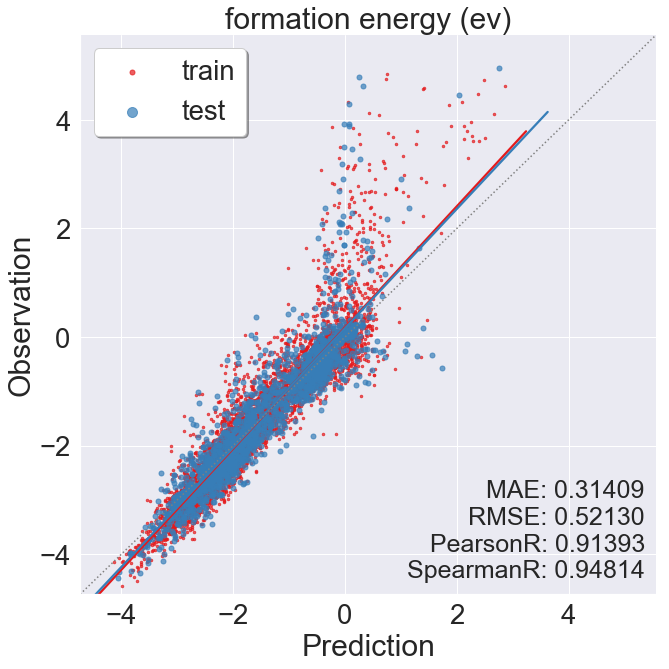

In [28]:
draw(y_true, y_pred, y_fit_true, y_fit_pred, prop_name='formation energy (ev)')

## Transfer learning

Here we will demostrate how to do a frozen feature transfer learning for pre-trained models.
To do that, we will introduce some new toys. Also show you the procedure list.

1. Prepare pre-trained model from source domain.
2. Have a frozenfeature calculator.
3. Combin 1) and 2) to generate new descriptor.
4. Use generated descriptor to do some machine learing on target domain. 

### access pre-trained models with MDL class

In [29]:
# --- import necessary libraries

from xenonpy.datatools import MDL

In [30]:
# --- init and check

mdl = MDL()
mdl

MDL(api_key='', save_to='.')

In [31]:
# --- query data

summary = mdl("stable",  # query string for model set name 
              property_has="ref", # query string for property name 
              save_to=False  #  set to False to prevent download.
             )

In [32]:
summary.head(5)

,descriptor,lang,mae,method,modelSet,property,r,regress,succeed,transferred,url
id,,,,,,,,,,,
MDL1244,xenonpy.composition,python,0.306266,pytorch.nn,stable_inorganic_compounds_in_mp,refractive_index,0.669438,True,True,False,http://xenon.ism.ac.jp/mdl/stable_inorganic_co...
MDL1246,xenonpy.composition,python,0.265756,pytorch.nn,stable_inorganic_compounds_in_mp,refractive_index,0.691587,True,True,False,http://xenon.ism.ac.jp/mdl/stable_inorganic_co...
MDL1248,xenonpy.composition,python,0.253245,pytorch.nn,stable_inorganic_compounds_in_mp,refractive_index,0.680995,True,True,False,http://xenon.ism.ac.jp/mdl/stable_inorganic_co...
MDL1250,xenonpy.composition,python,0.253240,pytorch.nn,stable_inorganic_compounds_in_mp,refractive_index,0.726014,True,True,False,http://xenon.ism.ac.jp/mdl/stable_inorganic_co...
MDL1252,xenonpy.composition,python,0.255026,pytorch.nn,stable_inorganic_compounds_in_mp,refractive_index,0.739503,True,True,False,http://xenon.ism.ac.jp/mdl/stable_inorganic_co...


### download models

We will download the top 5 models based on the MAE

In [33]:
summary = summary.sort_values('mae')
summary.head(5)

,descriptor,lang,mae,method,modelSet,property,r,regress,succeed,transferred,url
id,,,,,,,,,,,
MDL2064,xenonpy.composition,python,0.227588,pytorch.nn,stable_inorganic_compounds_in_mp,refractive_index,0.720082,True,True,False,http://xenon.ism.ac.jp/mdl/stable_inorganic_co...
MDL2808,xenonpy.composition,python,0.233900,pytorch.nn,stable_inorganic_compounds_in_mp,refractive_index,0.735080,True,True,False,http://xenon.ism.ac.jp/mdl/stable_inorganic_co...
MDL2010,xenonpy.composition,python,0.234696,pytorch.nn,stable_inorganic_compounds_in_mp,refractive_index,0.728820,True,True,False,http://xenon.ism.ac.jp/mdl/stable_inorganic_co...
MDL1505,xenonpy.composition,python,0.235224,pytorch.nn,stable_inorganic_compounds_in_mp,refractive_index,0.754349,True,True,False,http://xenon.ism.ac.jp/mdl/stable_inorganic_co...
MDL2202,xenonpy.composition,python,0.235340,pytorch.nn,stable_inorganic_compounds_in_mp,refractive_index,0.749597,True,True,False,http://xenon.ism.ac.jp/mdl/stable_inorganic_co...


In [34]:
urls = summary['url'].iloc[:5]
urls

id
MDL2064    http://xenon.ism.ac.jp/mdl/stable_inorganic_co...
MDL2808    http://xenon.ism.ac.jp/mdl/stable_inorganic_co...
MDL2010    http://xenon.ism.ac.jp/mdl/stable_inorganic_co...
MDL1505    http://xenon.ism.ac.jp/mdl/stable_inorganic_co...
MDL2202    http://xenon.ism.ac.jp/mdl/stable_inorganic_co...
Name: url, dtype: object

In [35]:
# --- use pull method to download models

results = mdl.pull(urls)

In [35]:
# check results

results

100%|██████████| 5/5 [00:04<00:00,  1.12it/s]


['/Users/liuchang/ws/Tutorial/stable_inorganic_compounds_in_mp/refractive_index/xenonpy.composition/pytorch.nn/aovo-290-284-189-98-73-48-29@1',
 '/Users/liuchang/ws/Tutorial/stable_inorganic_compounds_in_mp/refractive_index/xenonpy.composition/pytorch.nn/9x38-290-281-99-50-25@1',
 '/Users/liuchang/ws/Tutorial/stable_inorganic_compounds_in_mp/refractive_index/xenonpy.composition/pytorch.nn/gazj-290-238-98-74-53-21-11@1',
 '/Users/liuchang/ws/Tutorial/stable_inorganic_compounds_in_mp/refractive_index/xenonpy.composition/pytorch.nn/4iug-290-242-130-46-22-10@1',
 '/Users/liuchang/ws/Tutorial/stable_inorganic_compounds_in_mp/refractive_index/xenonpy.composition/pytorch.nn/sk5l-290-281-103-62-29-16-11@1']

### transfer learning form inorganic to organic

In [36]:
# load Polymer Genome data

pg = pd.read_pickle('polymer_sci_data_all.pkl')
pg.head(5)

,Smiles,Natoms,Ntypes,Volume of Cell($\AA^3$),"Band Gap, PBE(eV)","Band Gap, HSE06(eV)",Dielectric Constant,"Dielectric Constant, Electronic","Dielectric Constant, Ionic",Atomization Energy(eV/atom),Density(g/cm$^3$),Refractive Index,Ionization Energy(eV),Electron Affinity(eV),Cohesive Energy(eV/atom),composition,Formula
ID_name,,,,,,,,,,,,,,,,,
MOL1,[C@H]([CH]O)(O[C@H]1[C@H](CO)O[C@@H]([CH][C@@H...,84,3,572.42,5.62,7.48,3.78,2.85,0.93,-5.48,1.88,1.69,6.87,0.83,-0.63,"{'O': 20.0, 'H': 40.0, 'C': 24.0}",H40C24O20
MOL2,[CH][C@H](C[C@@H](C[C@H](C[CH][C]=[CH])C(=[CH]...,128,2,1258.30,3.94,4.83,2.72,2.64,0.08,-5.90,1.10,1.62,3.56,1.56,-0.63,"{'C': 64.0, 'H': 64.0}",H64C64
MOL3,C[C@H](C[CH][CH][CH]C)[CH2].C[C@@H](C[CH][CH][...,108,2,762.10,6.32,7.70,2.61,2.59,0.02,-5.14,1.10,1.61,6.19,0.43,-0.51,"{'C': 36.0, 'H': 72.0}",H72C36
MOL4,[C]F.[C]F.[C]([CH]F)(F)F.[F].[H],12,3,91.91,4.79,6.85,3.08,2.50,0.58,-5.11,2.96,1.58,8.60,1.52,0.61,"{'C': 4.0, 'H': 2.0, 'F': 6.0}",H2C4F6
MOL5,[S].[S].[S].[S].[C]/C=C\[C].[C]/C=C\[C].[C]/C=...,28,3,321.91,0.57,0.99,7.19,7.04,0.15,-6.18,1.69,2.65,4.53,2.97,0.06,"{'C': 16.0, 'S': 4.0, 'H': 8.0}",H8C16S4


In [37]:
pg_desc = composition.fit_transform(pg['composition'])
pg_desc.head(5)

,ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,ave:c6_gb,ave:covalent_radius_cordero,ave:covalent_radius_pyykko,...,min:num_s_valence,min:period,min:specific_heat,min:thermal_conductivity,min:vdw_radius,min:vdw_radius_alvarez,min:vdw_radius_mm3,min:vdw_radius_uff,min:sound_velocity,min:Polarizability
ID_name,,,,,,,,,,,,,,,,,,,,,
MOL1,4.095238,98.428910,168.333333,11.561905,7.721000,1488.273810,54.596505,20.761905,51.333333,51.666667,...,1.0,1.0,0.711,0.02658,110.0,120.0,162.0,288.6,317.5,0.666793
MOL2,3.500000,85.000000,172.000000,9.700000,6.509500,2560.140000,44.899820,27.205000,52.000000,53.500000,...,1.0,1.0,0.711,0.18050,110.0,120.0,162.0,288.6,1270.0,0.666793
MOL3,2.666667,83.000000,166.000000,11.166667,4.675667,1713.520000,48.866426,20.306667,45.000000,46.333333,...,1.0,1.0,0.711,0.18050,110.0,120.0,162.0,288.6,1270.0,0.666793
MOL4,6.666667,110.511807,170.500000,12.666667,13.670868,1745.885000,43.866076,22.151667,58.000000,62.333333,...,1.0,1.0,0.711,0.02770,110.0,120.0,162.0,288.6,1270.0,0.557000
MOL5,6.000000,92.714286,183.142857,9.271429,11.731429,3022.626286,36.185611,49.231429,65.571429,66.714286,...,1.0,1.0,0.711,0.18050,110.0,120.0,162.0,288.6,1270.0,0.666793


### retrieval your models

In [38]:
# --- import necessary libraries

from xenonpy.model.nn import Checker

In [39]:
# --- load pre-trained model

check = Checker.load('stable_inorganic_compounds_in_mp/refractive_index/xenonpy.composition/pytorch.nn/aovo-290-284-189-98-73-48-29@1')
check

<aovo-290-284-189-98-73-48-29@1> include:
"init_model": 1
"describe": 1
"y_true": 1
"splitter": 1
"y_pred": 1
"runner": 1
"y_true_fit": 1
"y_scale": 1
"scores": 1
"trained_model": 1
"x_scale": 1
"y_pred_fit": 1

In [40]:
# --- scale transform

X_scaler = check.last('x_scale')
pg_desc_ = X_scaler.transform(pg_desc)
pg_desc_

/usr/local/miniconda3/envs/xepy36/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator StandardScaler from version 0.19.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


array([[-2.49565241, -2.73213484, -2.06566775, ..., -0.58267778,
        -1.19611066, -1.09948681],
       [-2.65095953, -3.50616758, -1.92142292, ..., -0.58267778,
        -0.00833578, -1.09948681],
       [-2.89849631, -3.62552256, -2.15598929, ..., -0.58267778,
        -0.00833578, -1.09948681],
       ...,
       [-2.25500815, -2.8593988 , -2.01746408, ..., -0.58267778,
        -1.19611066, -1.09948681],
       [-2.2047618 , -3.04141036, -2.06635113, ..., -0.58267778,
        -1.19611066, -1.09948681],
       [-2.53906384, -3.25755408, -2.09805685, ..., -0.58267778,
        -1.19611066, -1.09948681]])

### prediction of Polymer Genomer refractive index form a inorganic model

In [41]:
# --- pre-trained model for prediction

y_pred = simple_predict(check.trained_model, pg_desc_)
y_pred[:5]

array([[0.25865424],
       [0.25396404],
       [0.27187717],
       [0.28128192],
       [0.55046076]], dtype=float32)

In [42]:
# --- scale transform

y_scaler = check.last('y_scale')
y_pred = y_scaler.inverse_transform(y_pred.ravel())
y_pred

array([1.348589 , 1.340124 , 1.3730385, ..., 1.4613906, 1.4385386,
       1.3973045], dtype=float32)

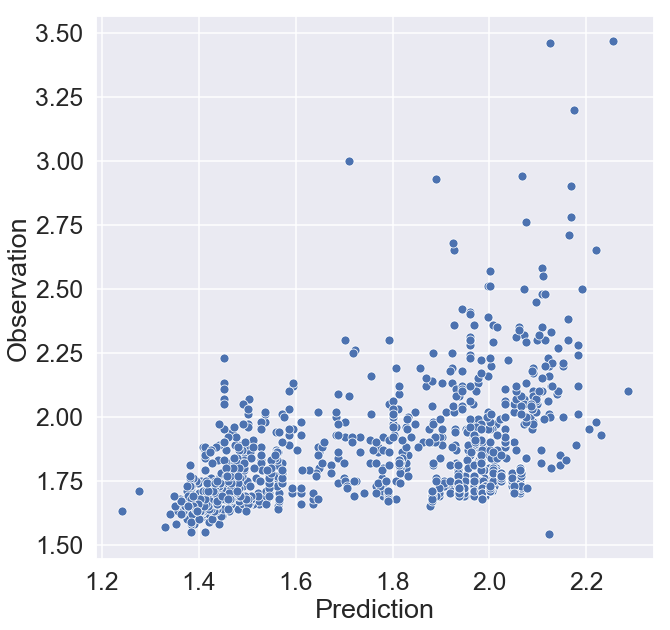

In [43]:
data = pd.DataFrame({'Prediction': y_pred, 'Observation': pg['Refractive Index'].values})
# data = pd.DataFrame({'Prediction': np.log(y_pred.ravel()), 'Observation': np.log(ctri_ref.values)})

sb.set_context('talk', font_scale=1.5)
plt.figure(figsize=(10, 10))
ax = sb.scatterplot(x="Prediction", y="Observation", data=data)

### frozen featurizer

In [44]:
# --- import necessary libraries

from xenonpy.descriptor import FrozenFeaturizer

In [45]:
# --- init FrozenFeaturizer with NN model

ff = FrozenFeaturizer(model=check.trained_model)
ff

FrozenFeaturizer(cuda=False, depth=None,
         model=Sequential(
  (0): Layer1d(
    (layer): Linear(in_features=290, out_features=284, bias=True)
    (batch_nor): BatchNorm1d(284, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act_func): ReLU()
    (dropout): Dropout(p=0.1)
  )
  (1): Layer1d(
    (layer): Linear(in_featur...pout(p=0.1)
  )
  (6): Layer1d(
    (layer): Linear(in_features=29, out_features=1, bias=True)
  )
),
         on_errors='raise', return_type='any')

In [46]:
# --- generate new descriptor

ff_descriptor = ff.transform(pg_desc_, depth=1 ,return_type='df')
ff_descriptor.head(5)

,L(-1)_1,L(-1)_2,L(-1)_3,L(-1)_4,L(-1)_5,L(-1)_6,L(-1)_7,L(-1)_8,L(-1)_9,L(-1)_10,...,L(-1)_20,L(-1)_21,L(-1)_22,L(-1)_23,L(-1)_24,L(-1)_25,L(-1)_26,L(-1)_27,L(-1)_28,L(-1)_29
0,-4.358868,-6.974391,-33.015968,-12.674155,-8.190677,-3.594921,-1.263103,-7.303878,-5.152706,-27.046162,...,-19.296021,-18.093885,-8.466791,8.603768,6.745081,-31.597719,-7.864301,-1.950370,-17.152351,-21.272667
1,-4.141970,-5.636797,-14.861248,-2.412704,-6.167406,0.345730,-4.211037,0.877367,-0.461650,-15.332149,...,-13.261558,-10.088490,-0.523882,4.155551,-1.086978,-16.278730,-4.987308,2.419169,-11.971654,-5.909220
2,-4.495153,-6.194894,-27.848259,-10.859283,-7.357226,-3.118665,-1.711845,-6.247580,-4.412067,-23.029686,...,-17.039110,-16.087767,-7.163743,7.821991,4.717700,-26.964067,-7.532869,-1.489739,-15.277795,-16.544161
3,-2.498382,-3.942477,-32.748859,-17.263586,-5.176078,-6.354302,3.383359,-13.231014,-7.583651,-22.071550,...,-13.310134,-16.322941,-13.014932,8.849362,11.201469,-29.237799,-7.109027,-6.060669,-12.021800,-23.880836
4,-1.950417,-3.244918,-12.991463,-6.071387,-3.242112,-1.555175,-0.013499,-2.873067,-2.388144,-8.580205,...,-6.632751,-7.167548,-3.754936,2.962764,1.834215,-13.277873,-3.049378,-0.759122,-6.260221,-6.586545


### concatenate 5 last hidden layers as new descriptor for transfer learning

In [47]:
# extract 5 last hidden layers and do a concatenation

descriptor = []
for path in results:
    check = Checker.load(path)
    ff.model = check.trained_model
    descriptor.append(ff.transform(pg_desc_, depth=1 ,return_type='array'))

desc = np.concatenate(descriptor, axis=1)

In [48]:
# --- check descriptor

desc.shape

(1069, 86)

In [49]:
# split data
y = pg['Refractive Index']

splitter = Splitter(len(y), test_size=0.2)
X_train, X_test, y_train, y_test = splitter.split(desc, y.values.reshape(-1, 1))

In [50]:
# random forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train.ravel())
y_pred = rf.predict(X_test)
y_fit_pred = rf.predict(X_train)

Missing directory and/or file name information!


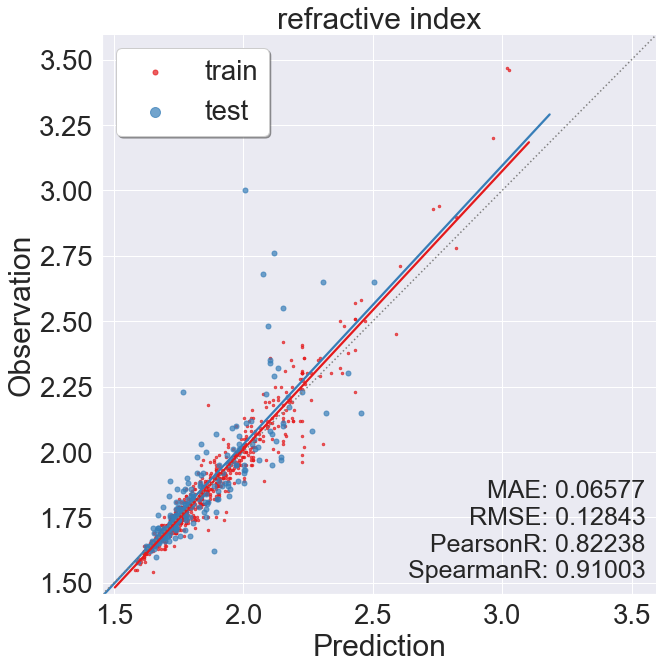

In [51]:
draw(y_test.ravel(), y_pred, y_train.ravel(), y_fit_pred, prop_name='refractive index')

In [52]:
# bayesian linear
from sklearn.linear_model import BayesianRidge

br = BayesianRidge()
br.fit(X_train, y_train.ravel())
y_pred = br.predict(X_test)
y_fit_pred = br.predict(X_train)

Missing directory and/or file name information!


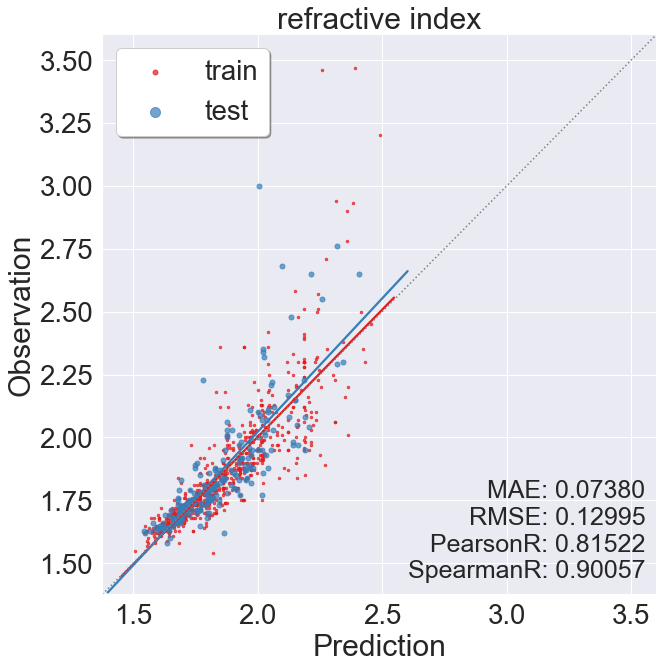

In [53]:
draw(y_test.ravel(), y_pred, y_train.ravel(), y_fit_pred, prop_name='refractive index')